In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt

In [2]:
data = genfromtxt("./2017_seoul_temperature-2C.csv", delimiter=',', skip_header=1)

In [3]:
print(data.shape)

(365, 2)


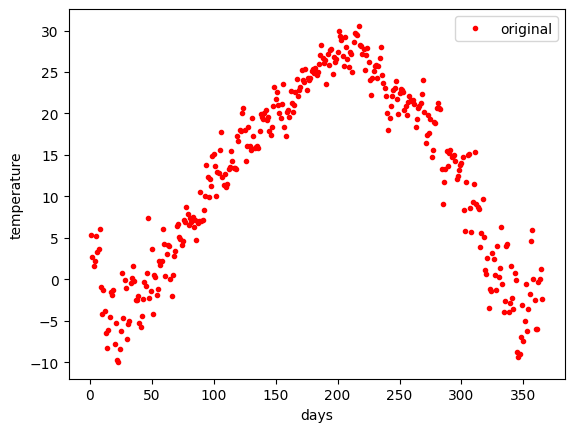

In [4]:
days = data[:, 0]
temp = data[:, 1]

plt.plot(days, temp, 'ro', markersize=3, label="original")
plt.xlabel("days")
plt.ylabel("temperature")
plt.legend()
plt.show()

12.297412480997261


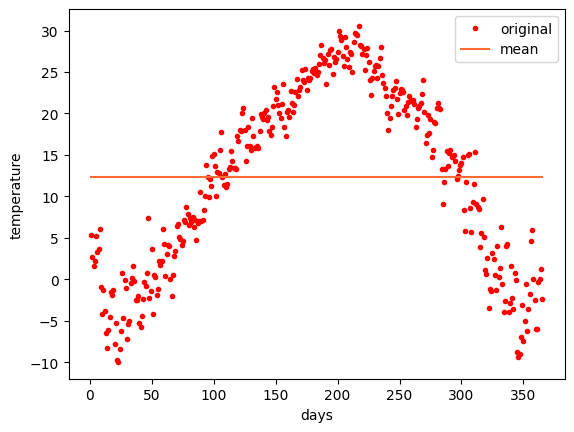

In [5]:
## average

mean = np.mean(temp)
print(mean)

means = np.repeat(mean, len(temp))

plt.plot(days, temp, 'ro', markersize=3, label="original")
plt.plot(days, means, color="#FF6B33", markersize=3, label="mean")

plt.xlabel("days")
plt.ylabel("temperature")
plt.legend()
plt.show()

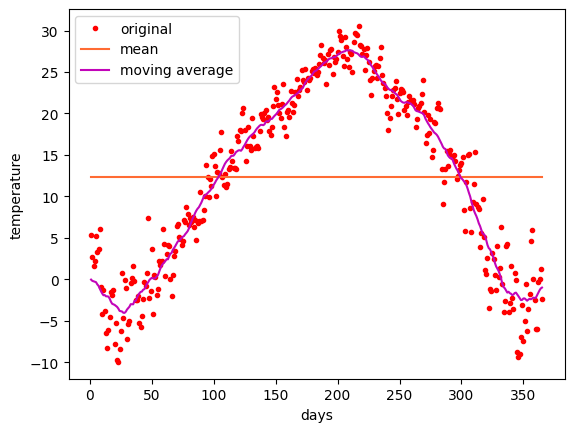

In [6]:
## Moving Average

## 30일치 데이터에 대한 평균을 구한다.
sma = np.convolve(temp, np.ones(30), 'same') / 30 ## 가중치가 1인 30차원의 벡터을 반영함 -> 결국은 가중치가 적용되지 않은 것과 같다.

plt.plot(days, temp, 'ro', markersize=3, label="original")
plt.plot(days, means, color="#FF6B33", markersize=3, label="mean")
plt.plot(days, sma, color="#C205B9", markersize=3, label="moving average")

plt.xlabel("days")
plt.ylabel("temperature")
plt.legend()
plt.show()

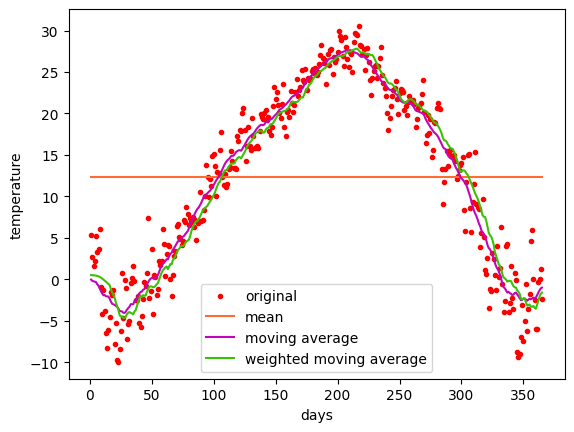

In [7]:
## Weighted Moving Average

weights = np.arange(1, 31)
wma = np.convolve(temp, weights, "same") / np.sum(weights)

plt.plot(days, temp, 'ro', markersize=3, label="original")
plt.plot(days, means, color="#FF6B33", markersize=3, label="mean")
plt.plot(days, sma, color="#C205B9", markersize=3, label="moving average")
plt.plot(days, wma, color="#39C205", markersize=3, label="weighted moving average")

plt.xlabel("days")
plt.ylabel("temperature")
plt.legend()
plt.show()

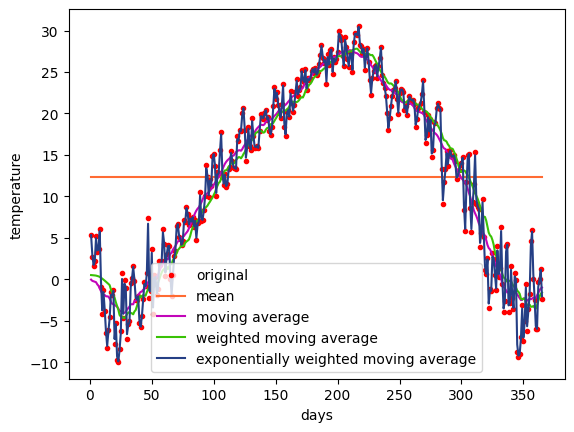

In [11]:
## Exponentially Weighted Moving Average
alpha = 0.9

ewma = np.zeros(len(temp))
ewma[0] = temp[0]  # 첫 번째 값은 원래 데이터와 동일하게 설정

for i in range(1, len(temp)):
    ewma[i] = alpha * temp[i] + (1 - alpha) * ewma[i - 1]

plt.plot(days, temp, 'ro', markersize=3, label="original")
plt.plot(days, means, color="#FF6B33", markersize=3, label="mean")
plt.plot(days, sma, color="#C205B9", markersize=3, label="moving average")
plt.plot(days, wma, color="#39C205", markersize=3, label="weighted moving average")
plt.plot(days, ewma, color="#253F85", markersize=3, label="exponentially weighted moving average")

plt.xlabel("days")
plt.ylabel("temperature")
plt.legend()
plt.show()